In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict

In [2]:
#load reference energy
ref0 = -900.0
ref_dict = {}
lines = open("funclib_median.txt", 'r').readlines()
for l in lines:
    es = l.strip().split()
    ref_dict[es[0]] = float(es[1])-ref0
print(ref_dict)

{'UA': 3.283999999999992, 'UB': -4.994000000000028, 'UC': 8.788999999999987, 'UD': 0.7150000000000318, 'UE': -10.514999999999986, 'UF': 3.05600000000004, 'UG': 3.3980000000000246, 'UH': 3.466000000000008, 'UX-ax': 0.32600000000002183, 'UX-ep': -1.6299999999999955}


In [3]:
#load positive data id
pos_ids = defaultdict(list)
lines = open("positive_data.txt", 'r').readlines()
for l in lines:
    es = l.strip().split()
    pos_ids[es[0]].append(es[1])
print(pos_ids)
print(np.sum([len(l) for l in pos_ids.values()]))

defaultdict(<class 'list'>, {'A': ['A10', 'B1', 'B2', 'F11', 'F12', 'G1', 'G2', 'G3', 'G4', 'H1', 'H2', 'H3', 'I10', 'J1', 'J2', 'J3', 'K1', 'K3', 'L10', 'M3', 'N2', 'N5', 'P1', 'P2', 'P3', 'Q5', 'Q10'], 'B': ['C7', 'C12', 'H1', 'H2', 'H3', 'I10', 'N2'], 'C': ['H1', 'H2', 'H3'], 'D': ['C4', 'H3'], 'E': ['C4', 'C7', 'M10', 'Q1', 'Q2', 'Q3'], 'F': ['C4', 'D10', 'H1', 'H3', 'M3'], 'G': ['B1', 'C5', 'C7', 'C9', 'I1', 'I3', 'J1', 'M10'], 'H': ['B1', 'E10', 'H4', 'J1', 'L7']})
63


In [4]:
#map tag to id
t2i = {}
lines = open("tag2id_mutations.txt", 'r').readlines()
for l in lines:
    es = l.strip().split()
    t2i[es[1]] = es[0]
print(t2i)

{'ALYLNCYVW': 'A1', 'ALYANSFVW': 'A6', 'ALALNCFVW': 'A3', 'ALMGNAYVW': 'A4', 'ALYLNCFVW': 'A5', 'ALYLNCWVW': 'A7', 'ALAMNAYVW': 'A8', 'SLCMNCYVW': 'A9', 'TLYLVWFLW': 'G4', 'ALALNCYVW': 'A11', 'ALMGNAFVW': 'A12', 'AFYMGGFVW': 'B1', 'AIFYGFFVW': 'B2', 'TLYLNCFVW': 'B3', 'TLYLNCFLW': 'B4', 'ALYANAFVW': 'B5', 'TLYLVWFLE': 'B6', 'TLYLVWFLG': 'B7', 'TLYLVWFLI': 'B8', 'TLYLVWFLN': 'B9', 'TLYLVWFLM': 'B10', 'TLYLVWFLK': 'B11', 'TLYLVWFLD': 'B12', 'TLYLVWFLP': 'C1', 'TLYLVWFLQ': 'C2', 'TLYLVWFLA': 'D3', 'TLYLAAFLL': 'C4', 'TLYLVAFLA': 'C9', 'TLYLAAFLC': 'C6', 'TLYLAAFLS': 'C7', 'TLYLVVFLV': 'C8', 'TLYLVCFLA': 'C10', 'TLYLVFFLA': 'C11', 'TLYLVLFLA': 'C12', 'TLYLVTFLA': 'D1', 'TLYLVVFLA': 'D2', 'TLYLVWFLC': 'D5', 'TLYLVFFLC': 'D6', 'TLYLVLFLC': 'D7', 'TLYLVTFLC': 'D8', 'TLYLVVFLC': 'D9', 'TLYLVCFLC': 'D10', 'TLYLVAFLL': 'D11', 'TLYLVLFLL': 'D12', 'TLYLVTFLL': 'E1', 'TLYLVWFLL': 'E3', 'TLYLVAFLS': 'E4', 'TLYLVCFLS': 'E5', 'TLYLVFFLS': 'E6', 'TLYLVLFLS': 'E7', 'TLYLVTFLS': 'E8', 'TLYLVVFLS': 'E9', 

In [5]:
#load energy data
all_data = pd.DataFrame()
for i in ["A","B","C","D","E","F","G","H"]:
    df = pd.read_csv("U"+i+"_sc.txt", sep=" ", header=None)
    #delete all zero col
    df = df.loc[:,~(df==0).all(axis=0)]
    #add UAA specific ref energy
    df['ref'] = ref_dict["U"+i]
    df['UAA'] = i
    df['label'] = [t2i[t] in pos_ids[i] for t in df[0]]
    df['id'] = [t2i[t] for t in df[0]]
    #print(df)
    all_data = pd.concat([all_data, df], axis=0, ignore_index=True)

In [6]:
all_data = all_data.rename(columns={0:"tag"})
all_data

,tag,1,2,3,4,5,6,7,8,12,13,22,ref,UAA,label,id
0,ACYVQCFCW,-24.0051,-23.8776,2.02105,17.5356,0.05247,3.95328,-1.44645,-4.13194,-1.42433,-0.67891,-7.99680,3.284,A,False,N9
1,AFYMGGFVW,-26.8855,-23.5745,1.47423,16.0292,0.05279,3.94058,-1.02180,-4.37312,-1.34091,-0.63584,-9.44936,3.284,A,True,B1
2,AIFANFYVW,-25.4982,-23.3516,2.57217,15.3742,0.05136,3.82375,-0.55634,-4.72345,-1.41379,-0.65033,-8.87399,3.284,A,True,P3
3,AIFYGFFVW,-25.4553,-22.3403,1.82180,15.3238,0.05133,3.75967,-0.70848,-4.72947,-1.40936,-0.68574,-8.91666,3.284,A,True,B2
4,ALALNCFVW,-25.1744,-22.3038,1.75465,15.1148,0.05192,3.87224,-0.82898,-4.27721,-1.40292,-0.64382,-8.66306,3.284,A,False,A3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,TLYLVWFLQ,-23.5938,-27.7221,4.91423,19.0956,0.07662,5.34519,-1.36020,-5.11745,-0.60892,-0.99807,-6.37507,3.466,H,False,C2
868,TLYLVWFLS,-20.8607,-26.2650,4.60498,18.3405,0.07660,5.40465,-0.93407,-4.41319,-0.48958,-1.27397,-4.94909,3.466,H,True,E10
869,TLYLVWFLT,-15.5414,-23.9837,4.87691,16.9269,0.07450,5.05972,-1.24448,-3.36936,-0.54651,-0.43044,-2.63648,3.466,H,False,F4
870,TLYLVWFLV,-25.9741,-26.8547,4.41757,17.2864,0.18990,5.51996,-1.08881,-4.38574,-0.75670,-1.60504,-7.27718,3.466,H,False,F9


In [7]:
#load ESM-1v, ESM-1b
df1v = pd.read_csv("../evotuning/mm_diskAB_1v_labeled.csv")
df1b = pd.read_csv("../evotuning/mm_diskAB_1b_labeled.csv")

In [8]:
all_data = pd.merge(all_data, df1v.loc[:, ['id','esm1v_t33_650M_UR90S_1']], how='left', on='id')
all_data = pd.merge(all_data, df1v.loc[:, ['id','esm1v_t33_650M_UR90S_2']], how='left', on='id')
all_data = pd.merge(all_data, df1v.loc[:, ['id','esm1v_t33_650M_UR90S_3']], how='left', on='id')
all_data = pd.merge(all_data, df1v.loc[:, ['id','esm1v_t33_650M_UR90S_4']], how='left', on='id')
all_data = pd.merge(all_data, df1v.loc[:, ['id','esm1v_t33_650M_UR90S_5']], how='left', on='id')
all_data = pd.merge(all_data, df1b.loc[:, ['id','esm_msa1b_t12_100M_UR50S']], how='left', on='id')

In [9]:
raw_data = all_data.copy()

In [10]:
#extract X
col = raw_data.columns.values.tolist()
col.remove('tag')
col.remove('UAA')
col.remove('label')
col.remove('id')

In [11]:
import numpy as np
X = np.array(raw_data[col])
y = np.array(raw_data['label'])

In [12]:
print(X.shape, np.sum(y))

(872, 18) 27


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import f1_score

In [33]:
h = 0.02  # step size in the mesh

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

In [15]:
from collections import defaultdict

In [16]:
X = StandardScaler().fit_transform(X)
score_train = defaultdict(list)
score_test = defaultdict(list)
for r in range(10):
    classifiers = [
        KNeighborsClassifier(3),
        SVC(kernel="linear", C=0.025),
        SVC(gamma=2, C=1),
        GaussianProcessClassifier(1.0 * RBF(1.0)),
        DecisionTreeClassifier(max_depth=5),
        RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
        MLPClassifier(alpha=1, max_iter=1000),
        AdaBoostClassifier(),
        GaussianNB(),
        QuadraticDiscriminantAnalysis(),
        
    ]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42+r)
    
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        y_pred_train = clf.predict(X_train)
        y_pred_test = clf.predict(X_test)
        f1_train = f1_score(y_train, y_pred_train)
        f1_test = f1_score(y_test, y_pred_test)
        score_train[name].append(f1_train)
        score_test[name].append(f1_test)

/home/wendao/.conda/envs/PyG/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wendao/.conda/envs/PyG/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wendao/.conda/envs/PyG/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wendao/.conda/envs/PyG/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wendao/.conda/envs/PyG/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wendao/.conda/envs/PyG/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are col

In [17]:
import matplotlib.pyplot as plt

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

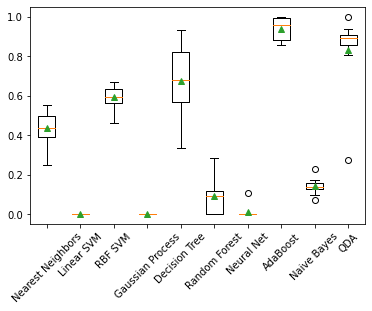

In [18]:
ax = plt.boxplot(score_train.values(), labels=names, showmeans=True)
plt.xticks(rotation=45)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

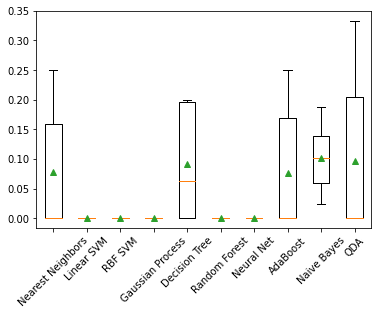

In [19]:
ax = plt.boxplot(score_test.values(), labels=names, showmeans=True)
plt.xticks(rotation=45)

In [20]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [21]:
#load eUnirep 1900/256/64 embedding
from jax_unirep.evotuning_models import mlstm1900
from jax_unirep.utils import load_params
from jax_unirep import get_reps

In [22]:
shift = 186

i2p = {0:302, 1:305, 2:306, 3:309, 4:346, 5:348, 6:384, 7:401, 8:417}

NAT = {
 302 : "A",
 305 : "L",
 306 : "Y",
 309 : "L",
 346 : "N",
 348 : "C",
 384 : "Y",
 401 : "V",
 417 : "W",
}

def gen_seq(tag):
    wt = "SAPALTKSQTDRLEVLLNPKDEISLNSGKPFRELESELLSRRKKDLQQIYAEERENYLGKLEREITRFFVDRGFLEIKSPILIPLEYIERMGIDNDTELSKQIFRVDKNFCLRPMLAPNLYNYLRKLDRALPDPIKIFEIGPCYRKESDGKEHLEEFTMLNFCQMGSGCTRENLESIITDFLNHLGIDFKIVGDSCMVYGDTLDVMHGDLELSSAVVGPIPLDREWGIDKPWIGAGFGLERLLKVKHDFKNIKRAARSESYYNGISTNL"
    seq = wt
    for i in range(9):
        pos = i2p[i]
        assert(wt[pos-shift]==NAT[pos])
        seq = seq[:pos-shift] + tag[i] + seq[pos-shift+1:]
    return seq

In [23]:
sequences = [gen_seq(t) for t in t2i.keys()]
s2t = {gen_seq(t):t for t in t2i.keys()}
params = load_params(folderpath='../evotuning/unirep/weights/1900/')[1]
h_avg, h_final, c_final= get_reps(sequences, params=params)

In [24]:
df_evo = pd.DataFrame()
for i, t in enumerate(t2i.keys()):
    d = pd.Series([s2t[sequences[i]]]+[x for x in h_avg[i]])
    assert(t == s2t[sequences[i]])
    df_evo = pd.concat([df_evo, d.to_frame().T], axis=0, ignore_index=True)

In [25]:
convert = {i:"e"+str(i) for i in range(1901)}
convert[0] = "tag"
df_evo = df_evo.rename(columns=convert)

In [26]:
raw_data = pd.merge(all_data, df_evo.loc[:, :], how='left', on='tag')

In [27]:
#extract X
col = raw_data.columns.values.tolist()
col.remove('tag')
col.remove('UAA')
col.remove('label')
col.remove('id')

In [28]:
import numpy as np
X = np.array(raw_data[col])
y = np.array(raw_data['label'])

In [29]:
print(X.shape, np.sum(y))

(872, 1918) 27


In [30]:
X = StandardScaler().fit_transform(X)
score_train = defaultdict(list)
score_test = defaultdict(list)
for r in range(10):
    classifiers = [
        KNeighborsClassifier(3),
        SVC(kernel="linear", C=0.025),
        SVC(gamma=2, C=1),
        GaussianProcessClassifier(1.0 * RBF(1.0)),
        DecisionTreeClassifier(max_depth=5),
        RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
        MLPClassifier(alpha=1, max_iter=1000),
        AdaBoostClassifier(),
        GaussianNB(),
        QuadraticDiscriminantAnalysis()]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42+r)
    
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        y_pred_train = clf.predict(X_train)
        y_pred_test = clf.predict(X_test)
        f1_train = f1_score(y_train, y_pred_train)
        f1_test = f1_score(y_test, y_pred_test)
        score_train[name].append(f1_train)
        score_test[name].append(f1_test)

/home/wendao/.conda/envs/PyG/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wendao/.conda/envs/PyG/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wendao/.conda/envs/PyG/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wendao/.conda/envs/PyG/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wendao/.conda/envs/PyG/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wendao/.conda/envs/PyG/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are col

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

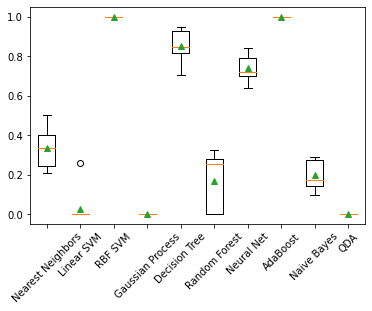

In [31]:
ax = plt.boxplot(score_train.values(), labels=names, showmeans=True)
plt.xticks(rotation=45)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

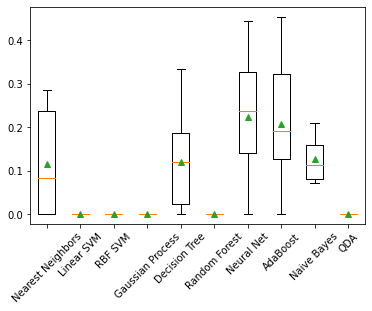

In [32]:
ax = plt.boxplot(score_test.values(), labels=names, showmeans=True)
plt.xticks(rotation=45)